# Obligatorio de Análisis Predictivo de Series Temporales


## Conteo de vehículos

## Estudiantes: Felipe Bastarrica y Emiliano Espíndola


In [1]:
#install.packages("feasts")
#cargo bibliotecas
library(astsa)
library(forecast)

#ajusto tamaño de gráficas
options(repr.plot.width=15, repr.plot.height=8)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [2]:
# Datos extraidos de https://catalogodatos.gub.uy/dataset/intendencia-montevideo-conteo-de-vehiculos-del-centro-de-gestion-de-la-movilidad

# Carga de datos preprocesados - Son datos para la calle Sarmiento de rambla a 
# requena del 1-1-2017 al 31-12-2018 sumarizado en 3 detectores sin contar sabados y domingos.
df <- read.csv("./volumen_Sarmiento_15_2017_092019.csv", )
df_raw = read.csv("./2017_2018_raw.csv", sep =";")

In [3]:
head(df)
weekend_days = 0

# Frecuencia de muestreo por 15 min
freq = ((365-weekend_days)*24*60)/(3*5)
freq_aux = ((365-weekend_days)*24*60)/(3*5*(365/7))
# Frecuencia por semana
#freq = (365-weekend_days)/(5)
freq

head(df_raw)


,date,volumen15
,<chr>,<int>
1,1/1/17 00:00,16
2,1/1/17 00:15,31
3,1/1/17 00:30,37
4,1/1/17 00:45,33
5,1/1/17 01:00,76
6,1/1/17 01:15,119


[1] 35040

,date,volumen
,<chr>,<int>
1,1/1/17 00:00,0
2,1/1/17 00:00,0
3,1/1/17 00:00,0
4,1/1/17 00:05,0
5,1/1/17 00:05,0
6,1/1/17 00:05,0


In [4]:
# Definición de Time Series (no se coloca la referencia en 2017 por ahora)
df_ts = ts(df$volumen, frequency=freq, start=c(2017,1))
df_ts_aux = ts(df$volumen, frequency=freq_aux, start=c(2017,10))
df_ts_aux_raw = ts(df_raw$volumen, frequency=((365-weekend_days)*24*60)/(5), start=c(2017,1))

#time(df_ts_aux_raw)

In [5]:
2017.00000951294-2017.00001902588

[1] -9.51294e-06

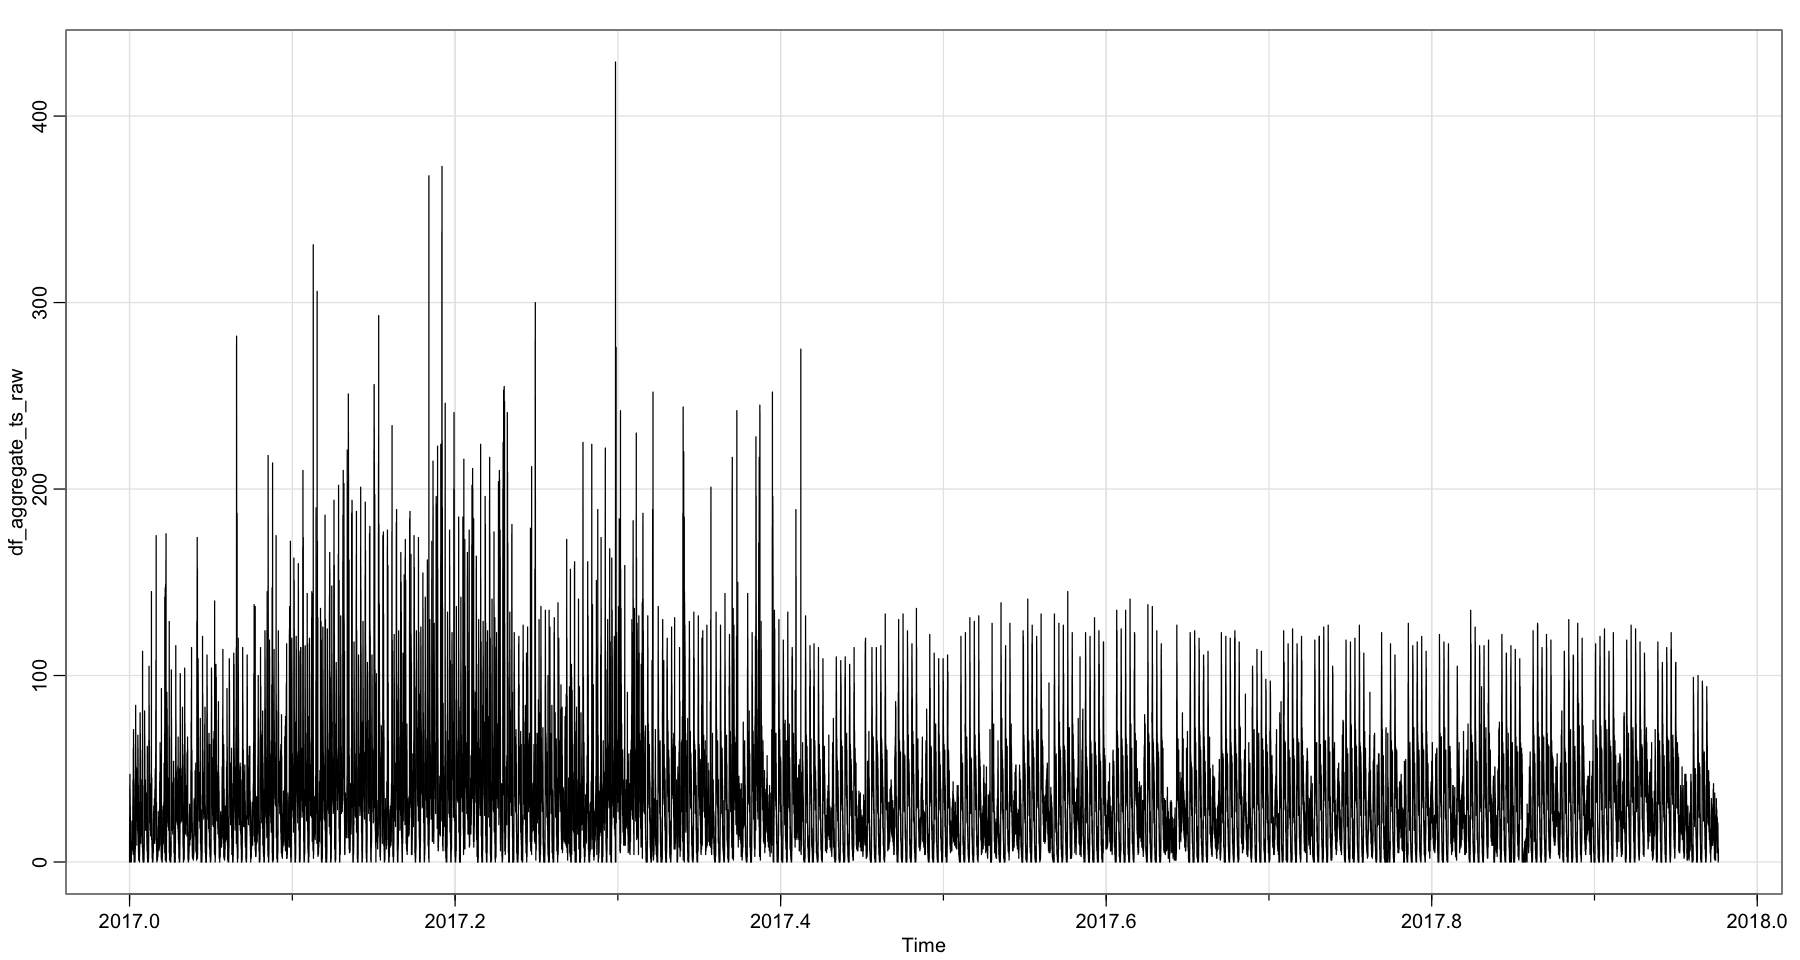

In [6]:
df_aggregate_raw = aggregate(df_ts_aux_raw, nfrequency = (365*24*60)/(5*3), FUN = sum)
df_aggregate_ts_raw = ts(df_aggregate_raw, frequency = (365*24*60)/(5), start=c(2017,1))
# Plot de la TS
tsplot(df_aggregate_ts_raw)
#time(df_aggregate_raw)

[1] 82.34276

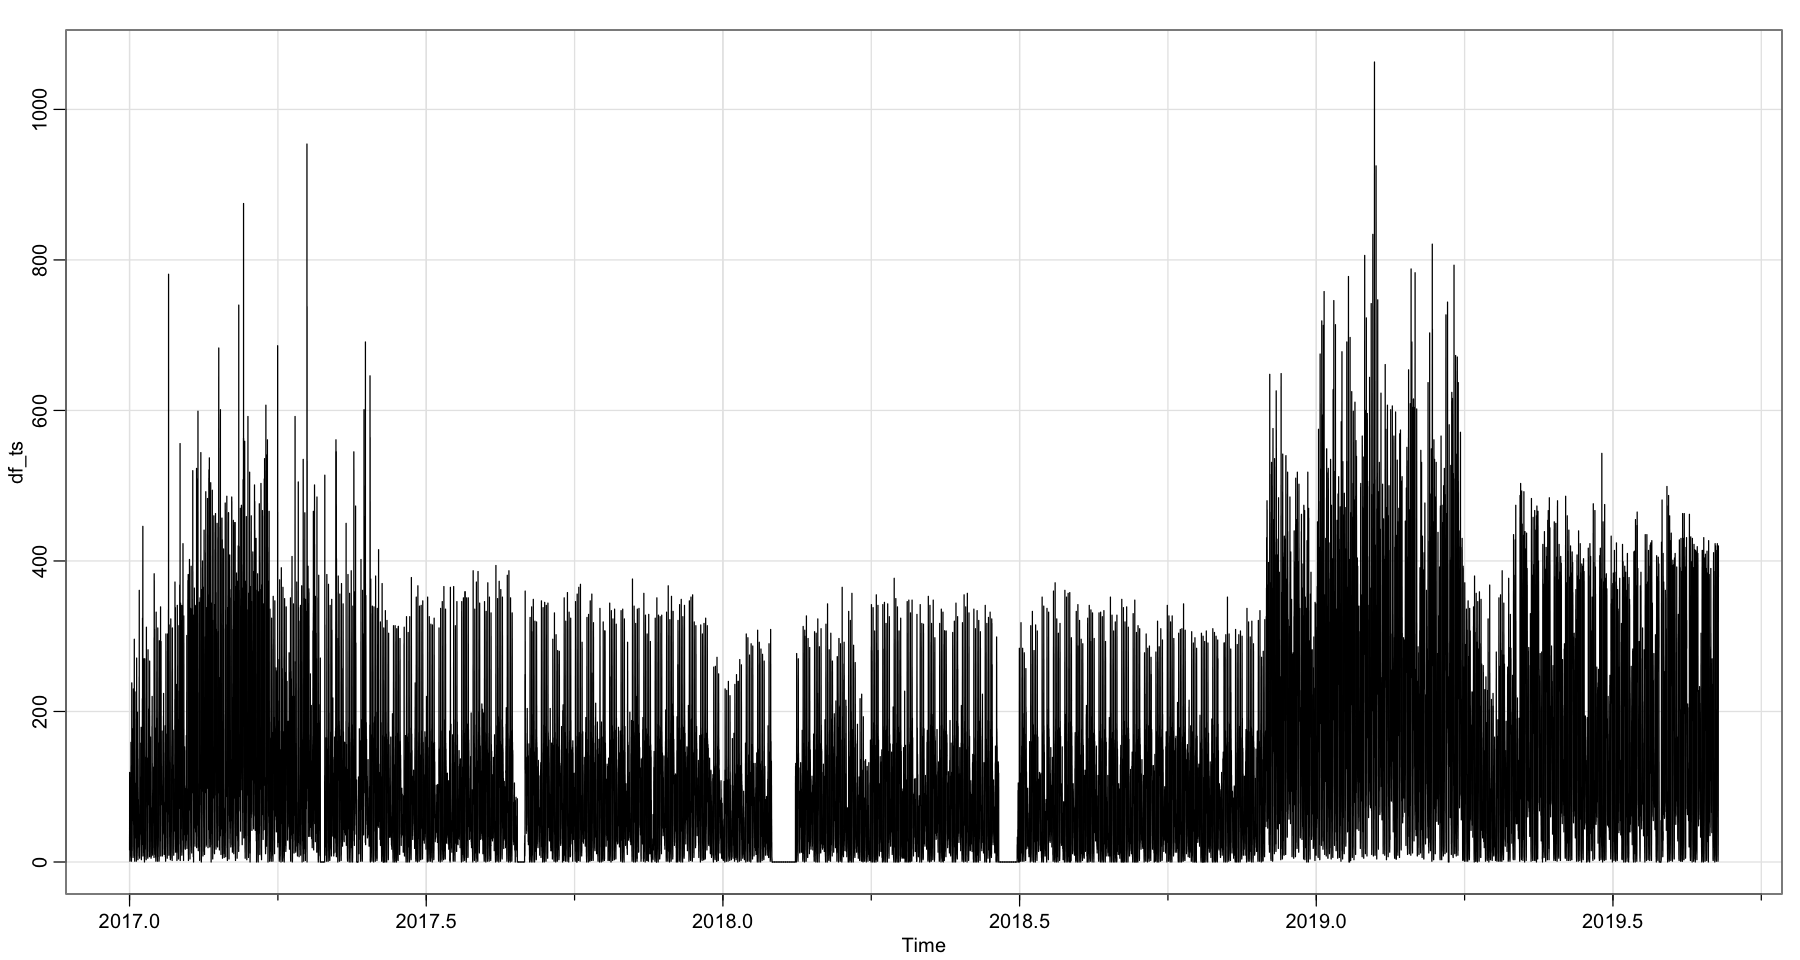

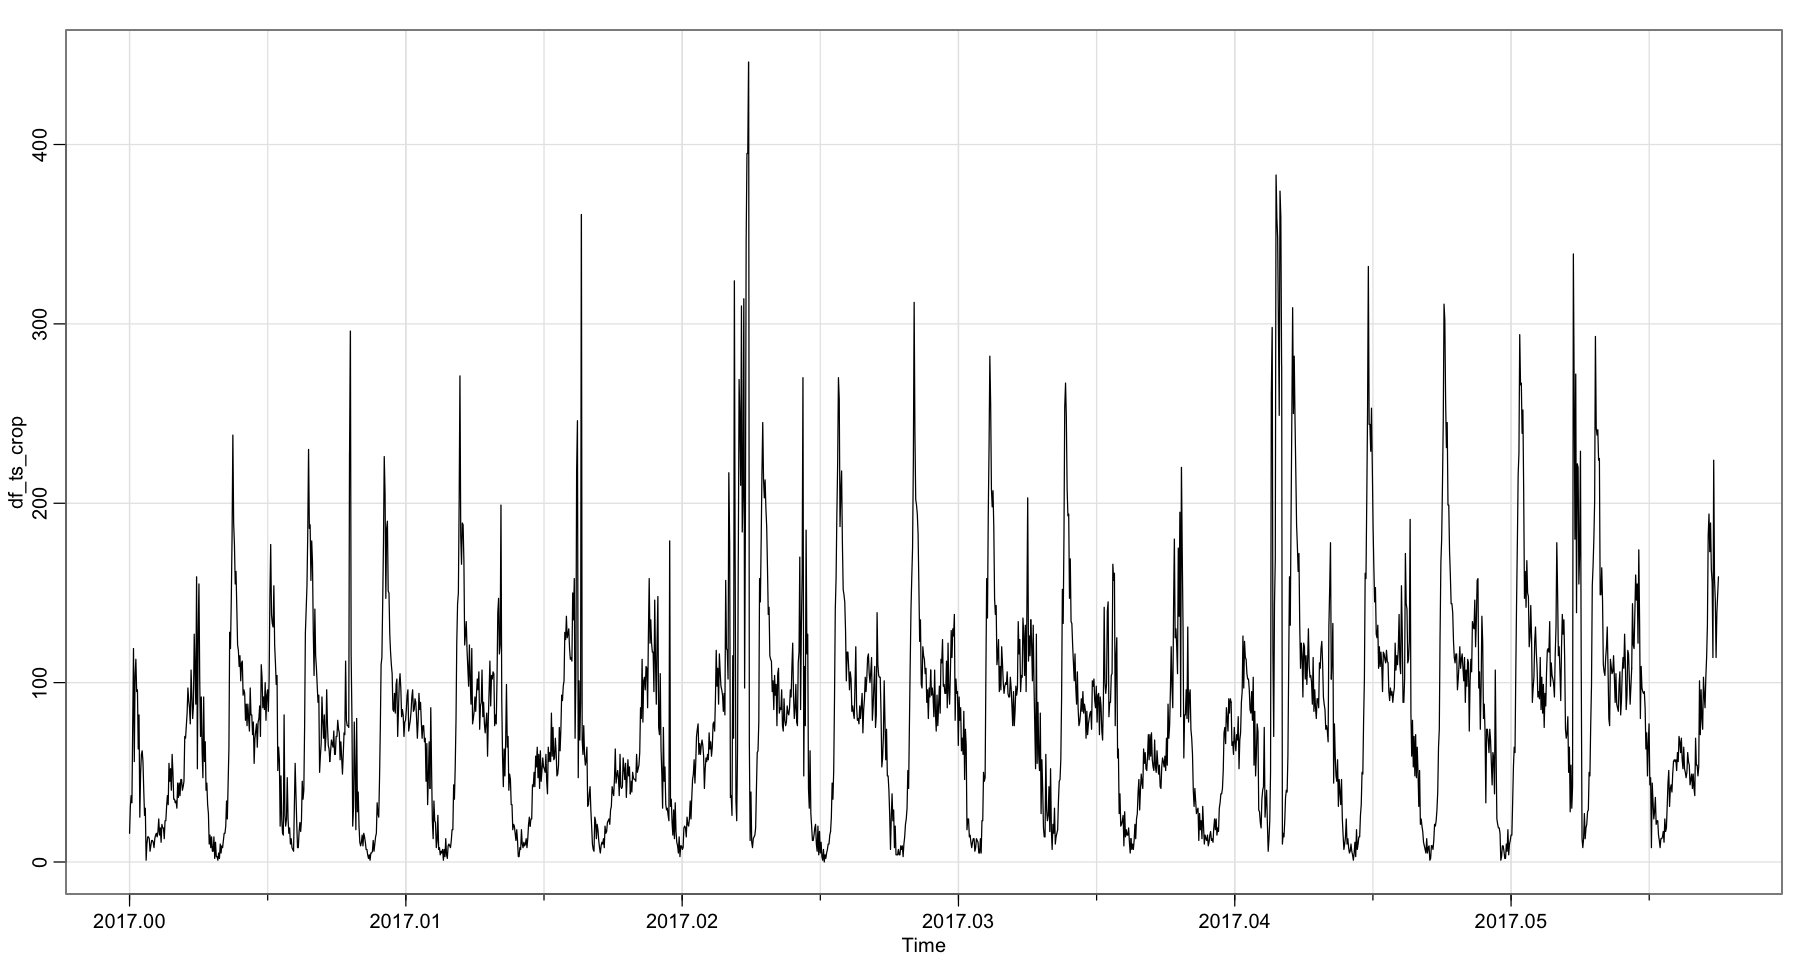

In [7]:
# Plot de la TS
tsplot(df_ts)

# Días a tomar para análisis más pequeño
days_to_crop = 21

# Muestras por día (4 muestras cada 15 minutos x 24)
samples_per_day = 96

# Serie recortada
df_ts_crop = head(df_ts, samples_per_day*days_to_crop)

# Promedio de serie cortada
mean(df_ts_crop)

# Plot de la serie cortada
tsplot(df_ts_crop)


[1] 672

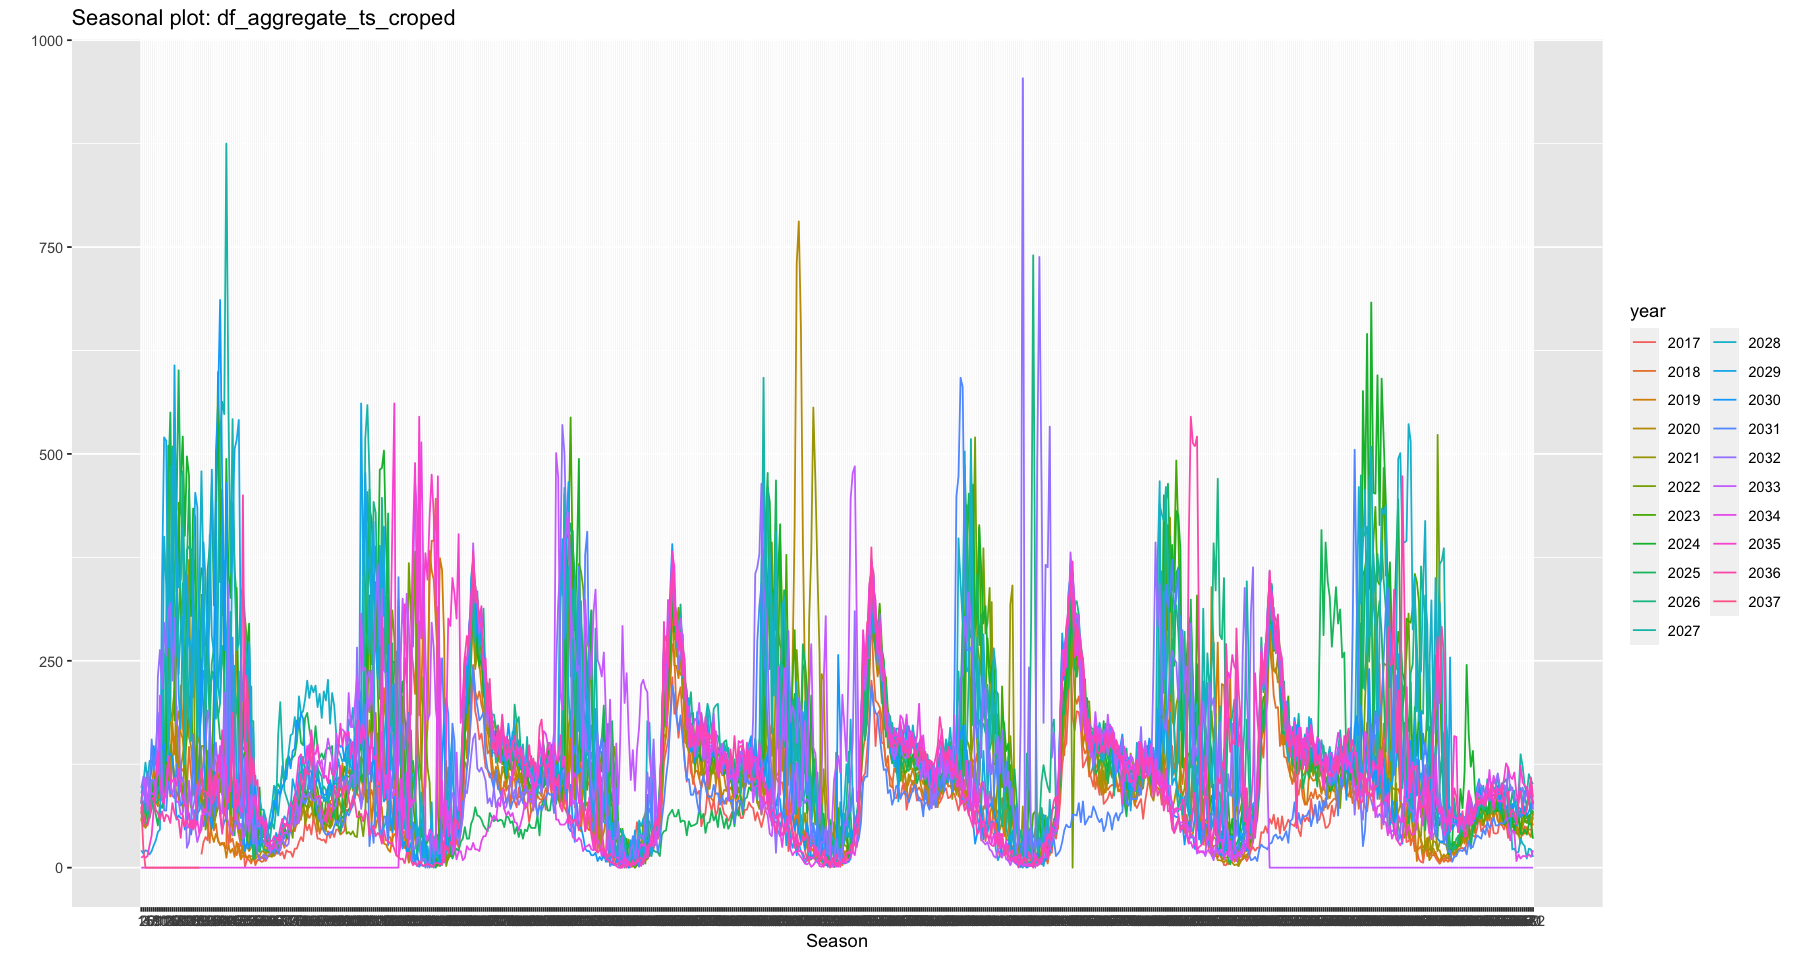

In [8]:
freq_aux
df_aggregate = aggregate(df_ts_aux, nfrequency = freq_aux, FUN = sum)
df_aggregate_ts = ts(df_aggregate, frequency = freq_aux, start=c(2017,30))
#tsplot(df_aggregate_ts)

df_aggregate_ts_croped = head(df_aggregate_ts, (96*7)*20)
#length(df_aggregate_ts_croped)
#time(df_aggregate_ts_croped)
ggseasonplot(df_aggregate_ts_croped)

In [9]:
#gg_season(df_aggregate_ts_croped)# , period = "week"

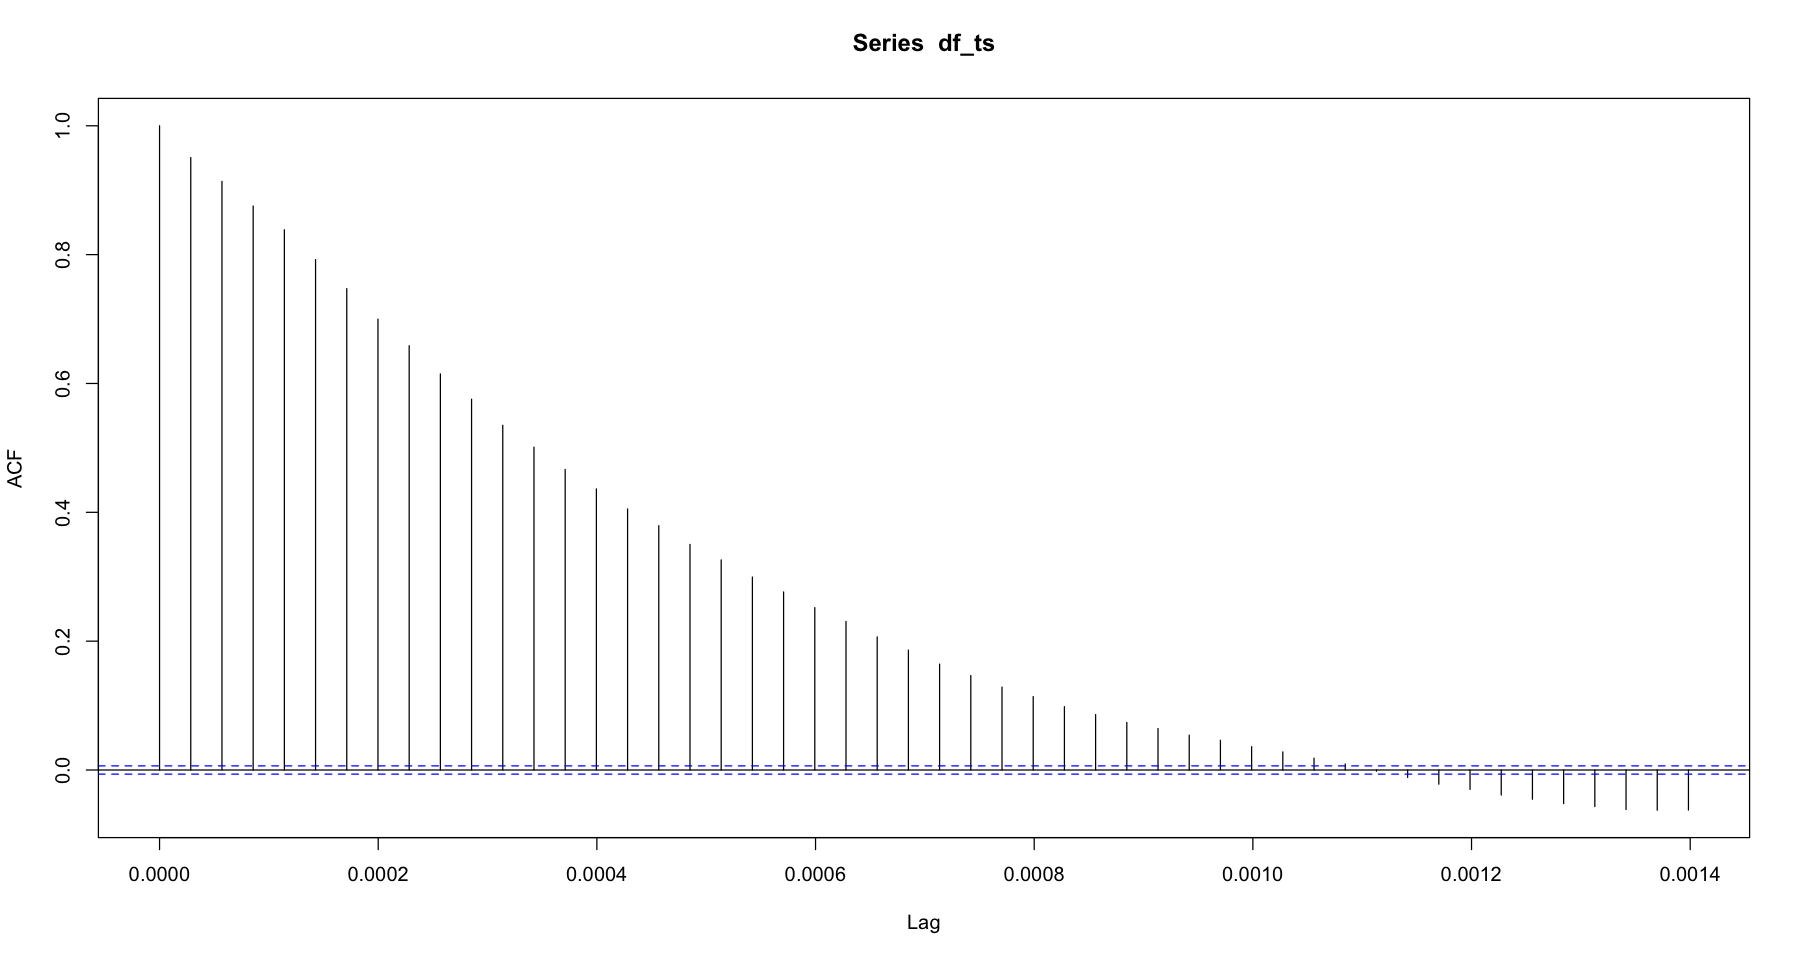

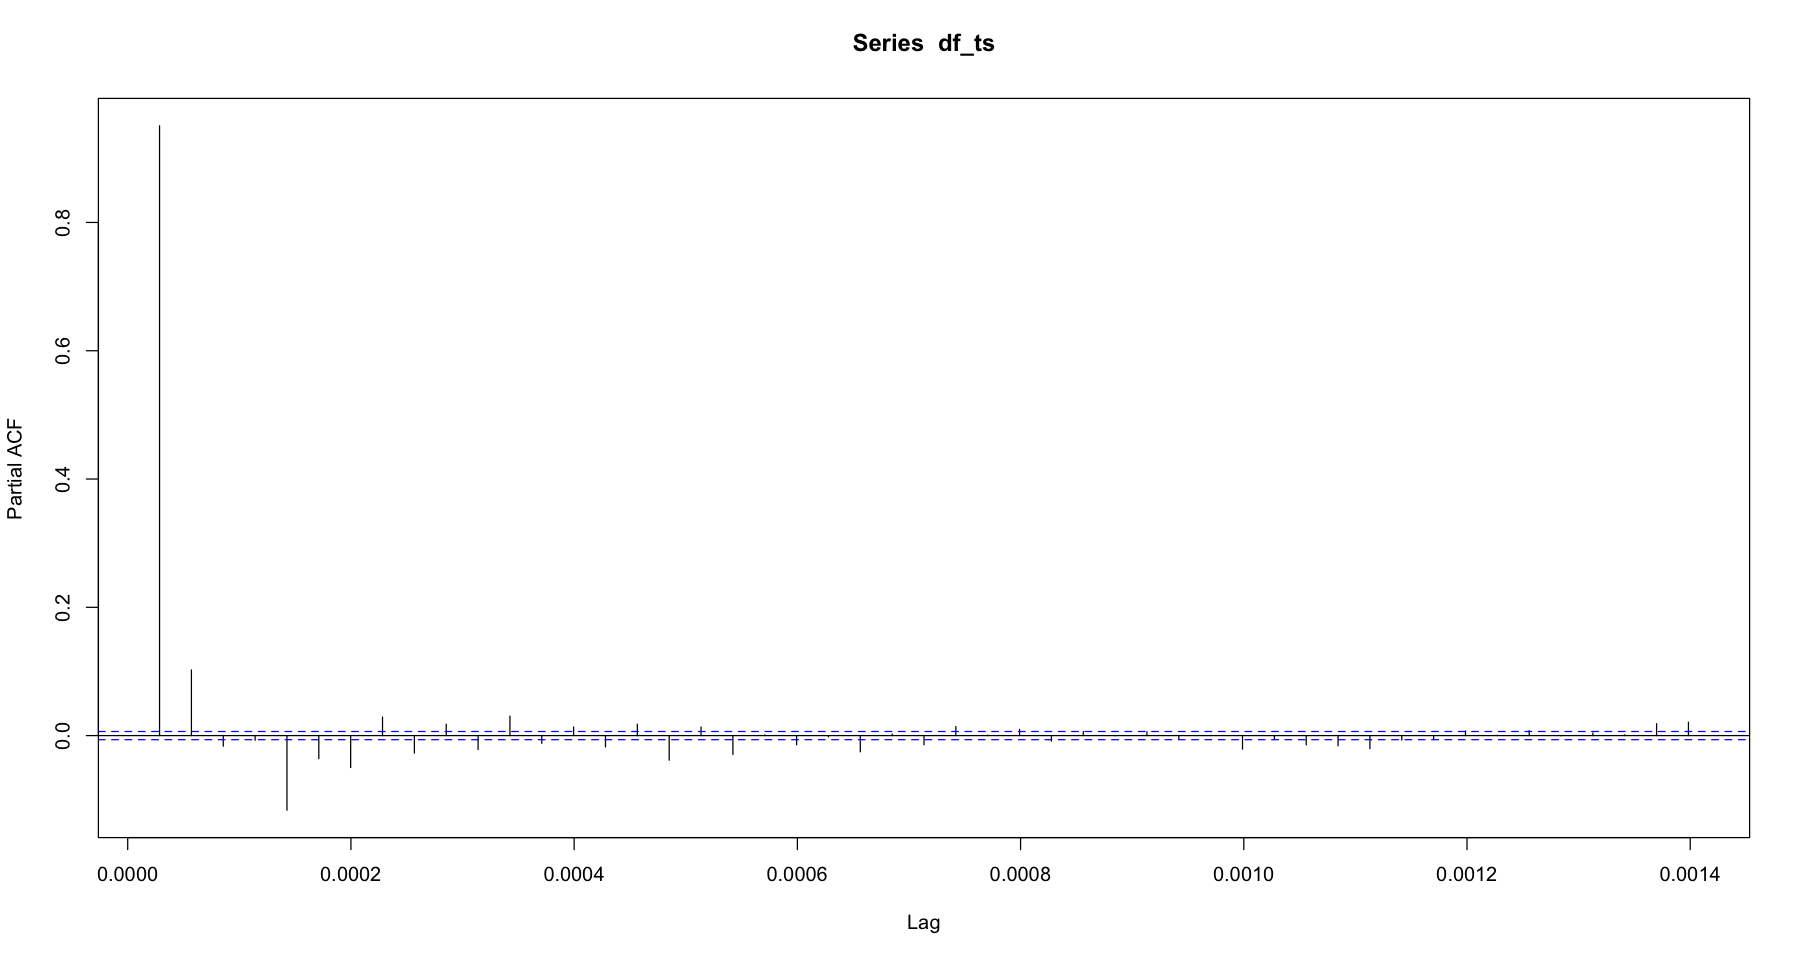

In [10]:
acf(df_ts)
pacf(df_ts)

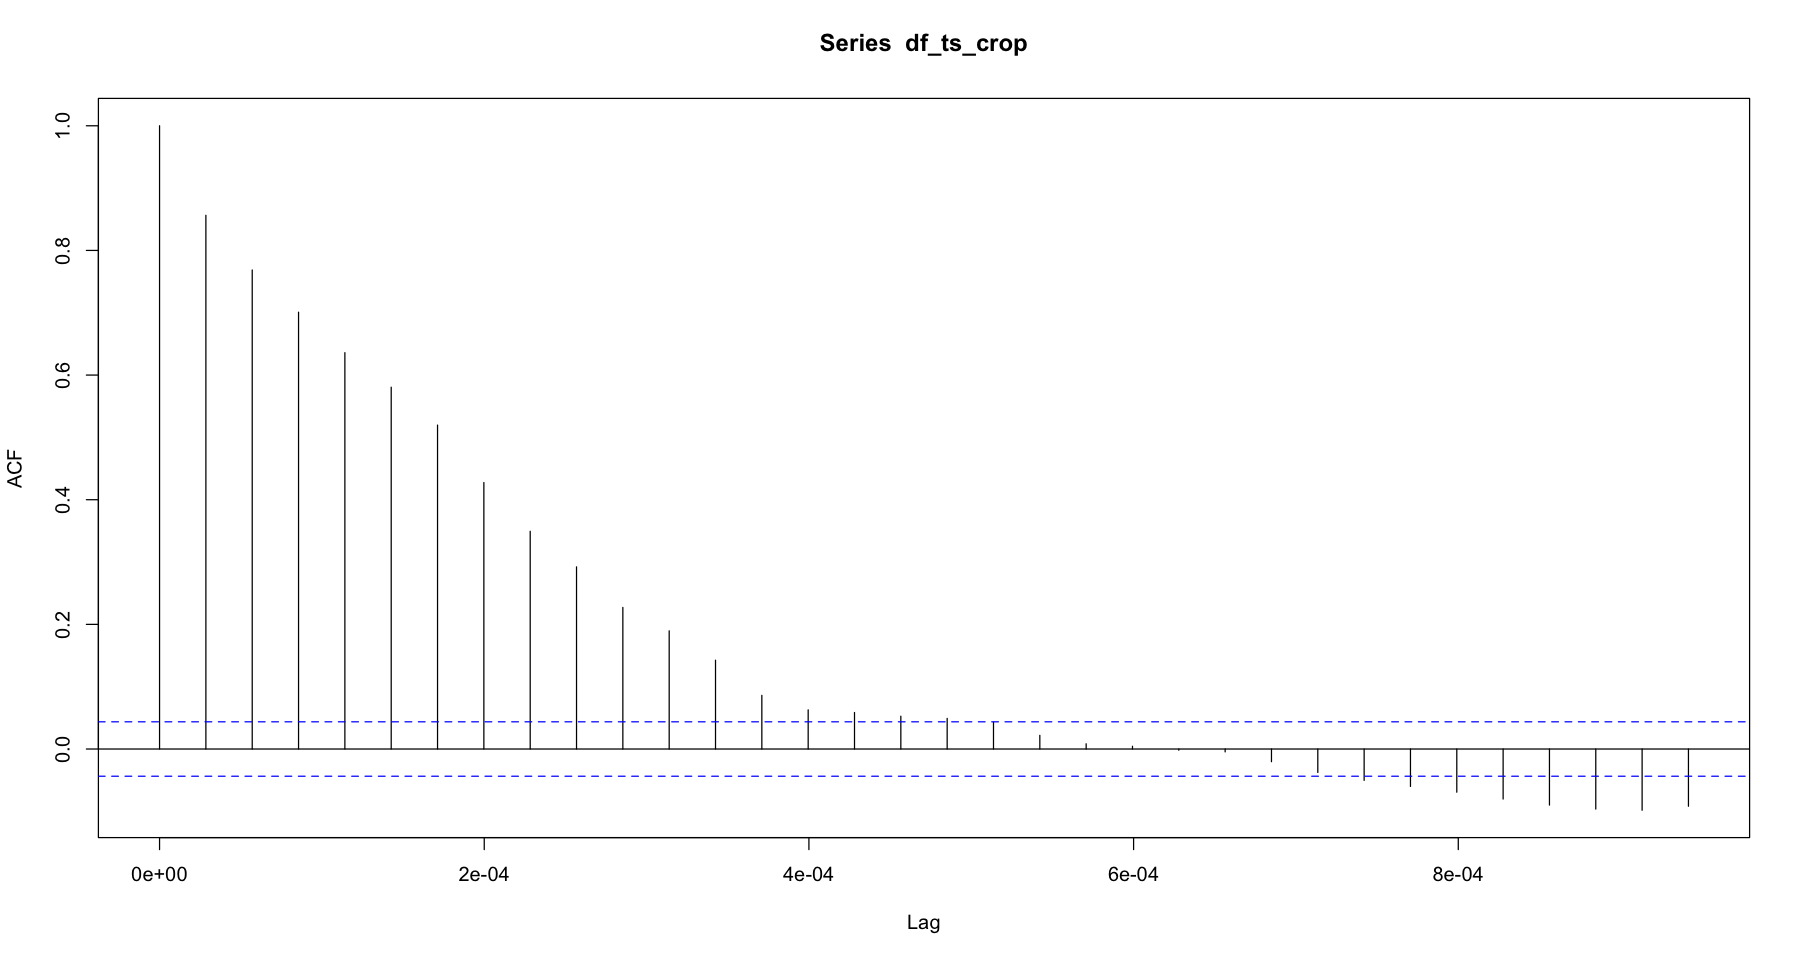

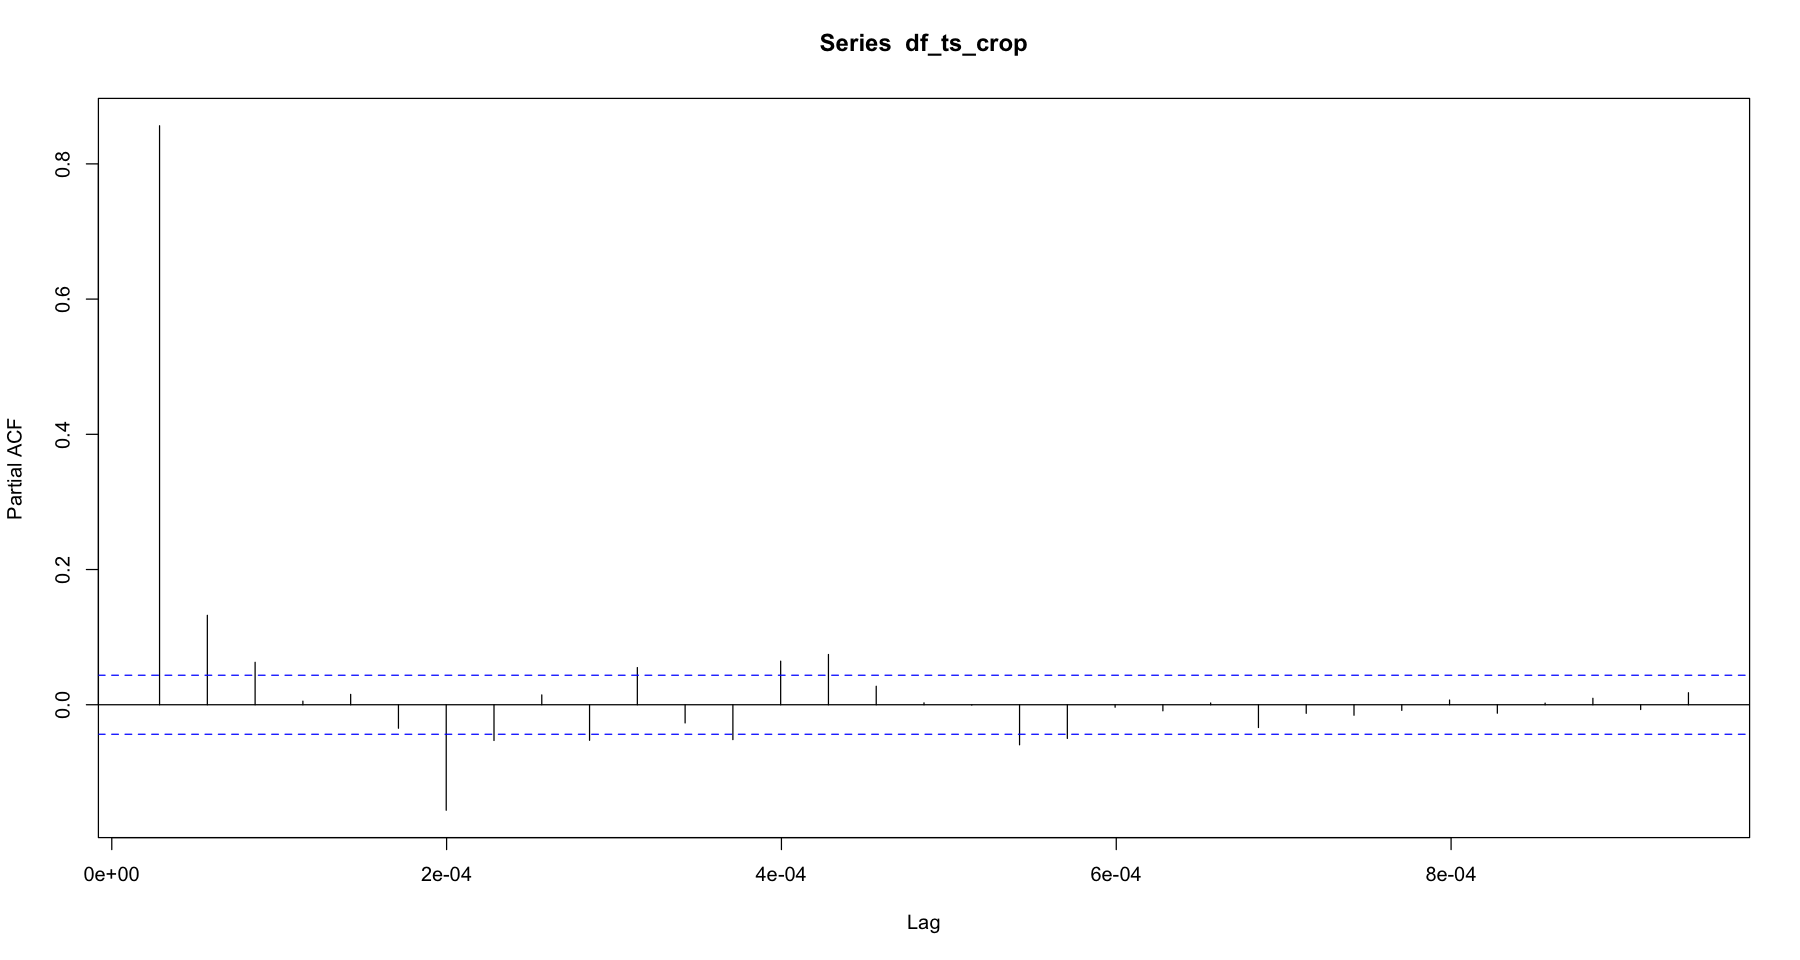

In [11]:
acf(df_ts_crop)
pacf(df_ts_crop)

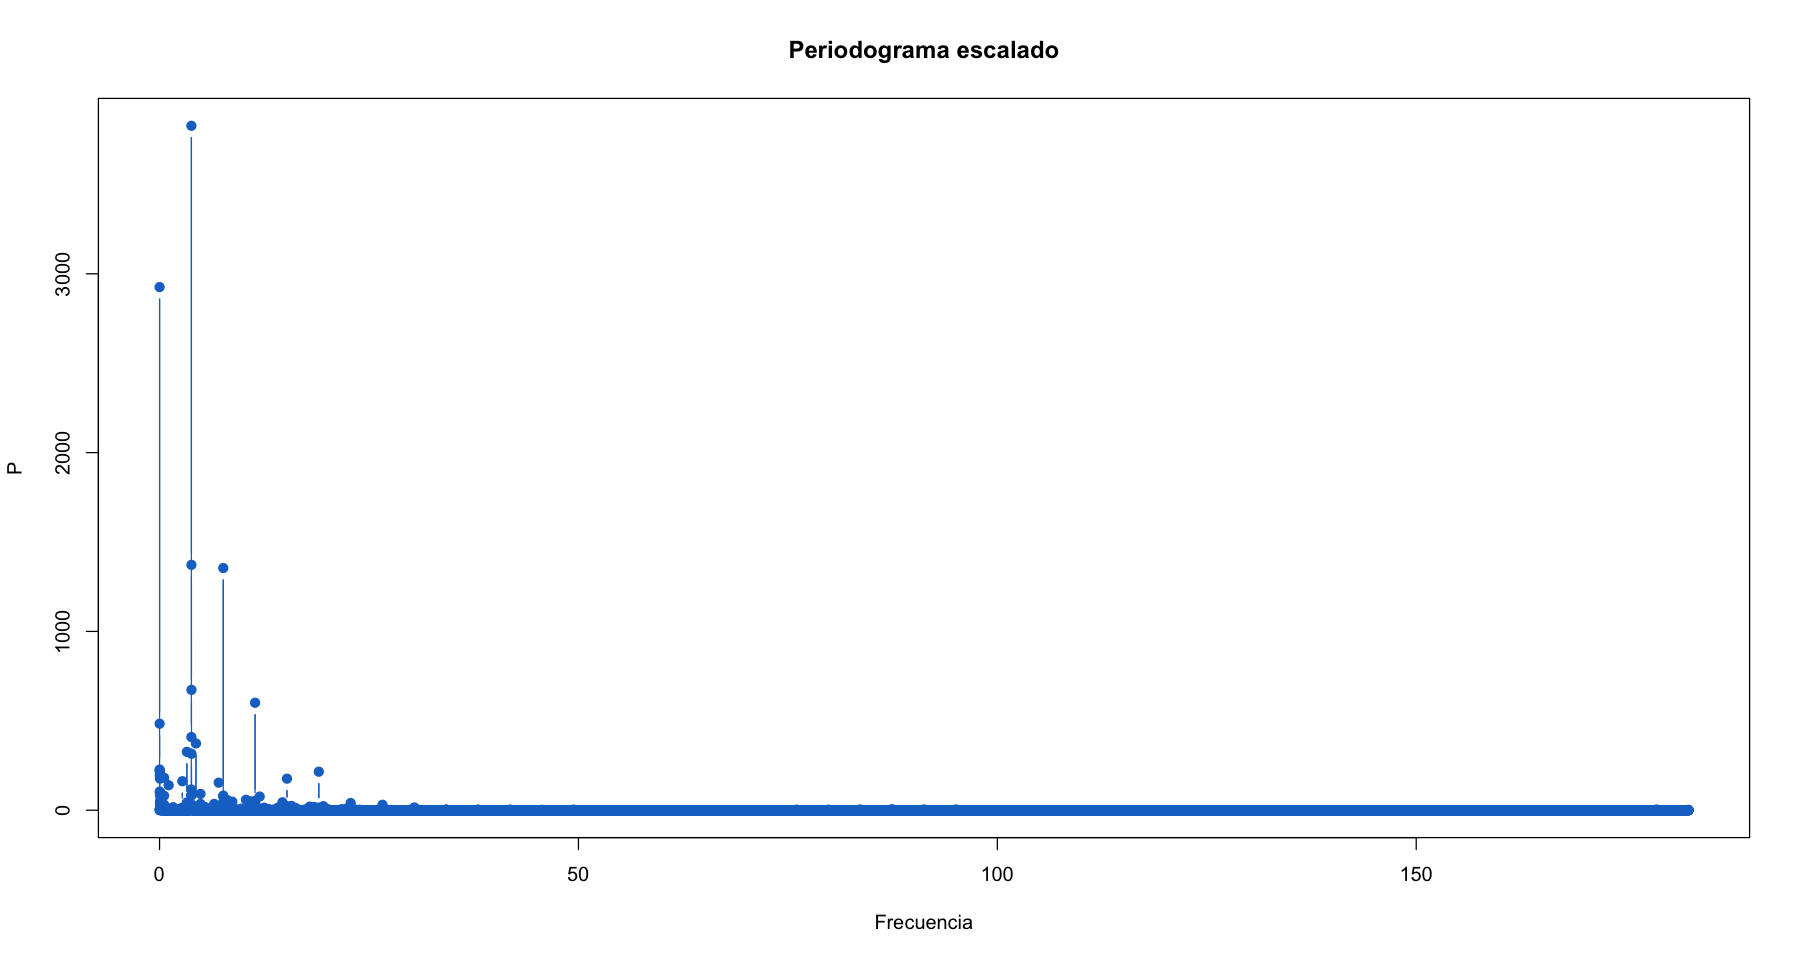

In [12]:
# Estudio de la periodicidad 
freq_periodograma = (24*60)/(3*5) # 24 horas * 60 minutos es la granularidad de minutos por día * 5 minutos por muestra agregado en 3 muestras 
s = df_ts
s = s-mean(s) # Se quita la media
n = length(s)
I = abs(fft(s))^2 #FFT y módulo cuadrado
I = I[1:floor(n/2)] #Recorto el vector a las frecuencias observables
P = (4/n^2)*I #Escalado del periodograma
f = (0:(n/2-1))/n*freq/96 #Vector de frecuencias para hacer el gráfico (se multiplica por la frecuencia de la serie, para normalizar

#Ploteo del periodograma
plot(f, P, type="b", xlab="Frecuencia", main="Periodograma escalado", col=4, lwd=1, pch=19)

In [13]:
# Primera frecuencia de mayor importancia
f1 = f[which.max(P)]*samples_per_day
f1

# Segunda frecuencia de mayor importancia
P[which.max(P)] = 0
f2 = f[which.max(P)]*samples_per_day
f2

# Tercera frecuencia de mayor importancia
P[which.max(P)] = 0
f3 = f[which.max(P)]*samples_per_day
f3

# Cuarta frecuencia de mayor importancia
P[which.max(P)] = 0
f4 = f[which.max(P)]*samples_per_day
f4

# Quinta frecuencia de mayor importancia
P[which.max(P)] = 0
f5 = f[which.max(P)]*samples_per_day
f5

[1] 364.8483

[1] 0.3734374

[1] 365.2217

[1] 730.07

[1] 365.5952


Call:
lm(formula = df_ts_crop ~ t + cos(2 * pi * f1 * t) + sin(2 * 
    pi * f1 * t) + cos(2 * pi * f3 * t) + sin(2 * pi * f3 * t) + 
    cos(2 * pi * f4 * t) + sin(2 * pi * f4 * t))

Residuals:
    Min      1Q  Median      3Q     Max 
-109.23  -29.44   -7.33   15.24  421.81 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.218e+06  1.460e+05  -8.346  < 2e-16 ***
t                     6.040e+02  7.236e+01   8.346  < 2e-16 ***
cos(2 * pi * f1 * t)  8.128e+01  4.366e+01   1.862 0.062780 .  
sin(2 * pi * f1 * t)  8.530e+01  4.360e+01   1.957 0.050544 .  
cos(2 * pi * f3 * t)  9.171e+01  4.362e+01   2.103 0.035628 *  
sin(2 * pi * f3 * t) -1.071e+02  4.363e+01  -2.454 0.014229 *  
cos(2 * pi * f4 * t)  3.321e+01  1.700e+00  19.542  < 2e-16 ***
sin(2 * pi * f4 * t)  6.091e+00  1.698e+00   3.586 0.000344 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.92 on 2008 degrees of freedom
Multi

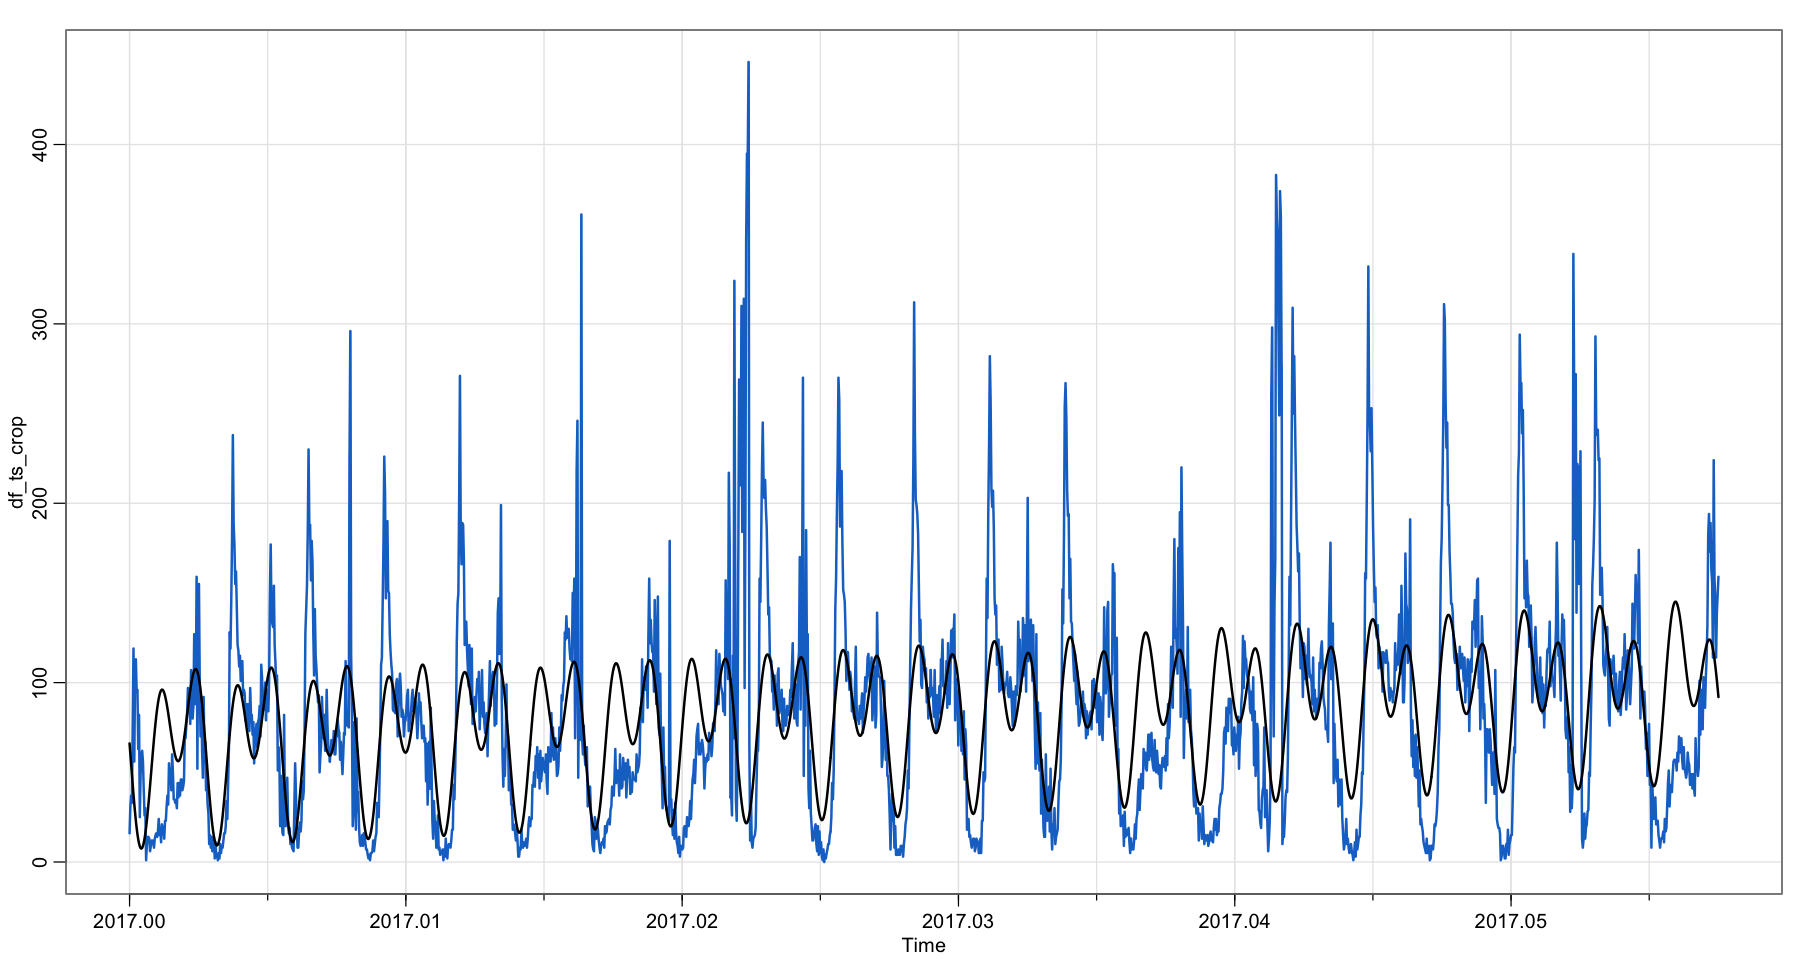

In [14]:
t = time(df_ts_crop)

# Creación de fit con las 3 frecuencias halladas
fit_df_ts_crop = lm(df_ts_crop ~ t + cos(2*pi*f1*t)+sin(2*pi*f1*t)+cos(2*pi*f3*t)+sin(2*pi*f3*t)+cos(2*pi*f4*t)+sin(2*pi*f4*t))

summary(fit_df_ts_crop)

adjustment_fit_df_ts_crop = ts(fitted(fit_df_ts_crop), start=2017, freq=freq)
tsplot(df_ts_crop, col=4, lwd=2)
lines(adjustment_fit_df_ts_crop, lwd=2)

# Residuals del ajuste
residuals_fit = residuals(fit_df_ts_crop)

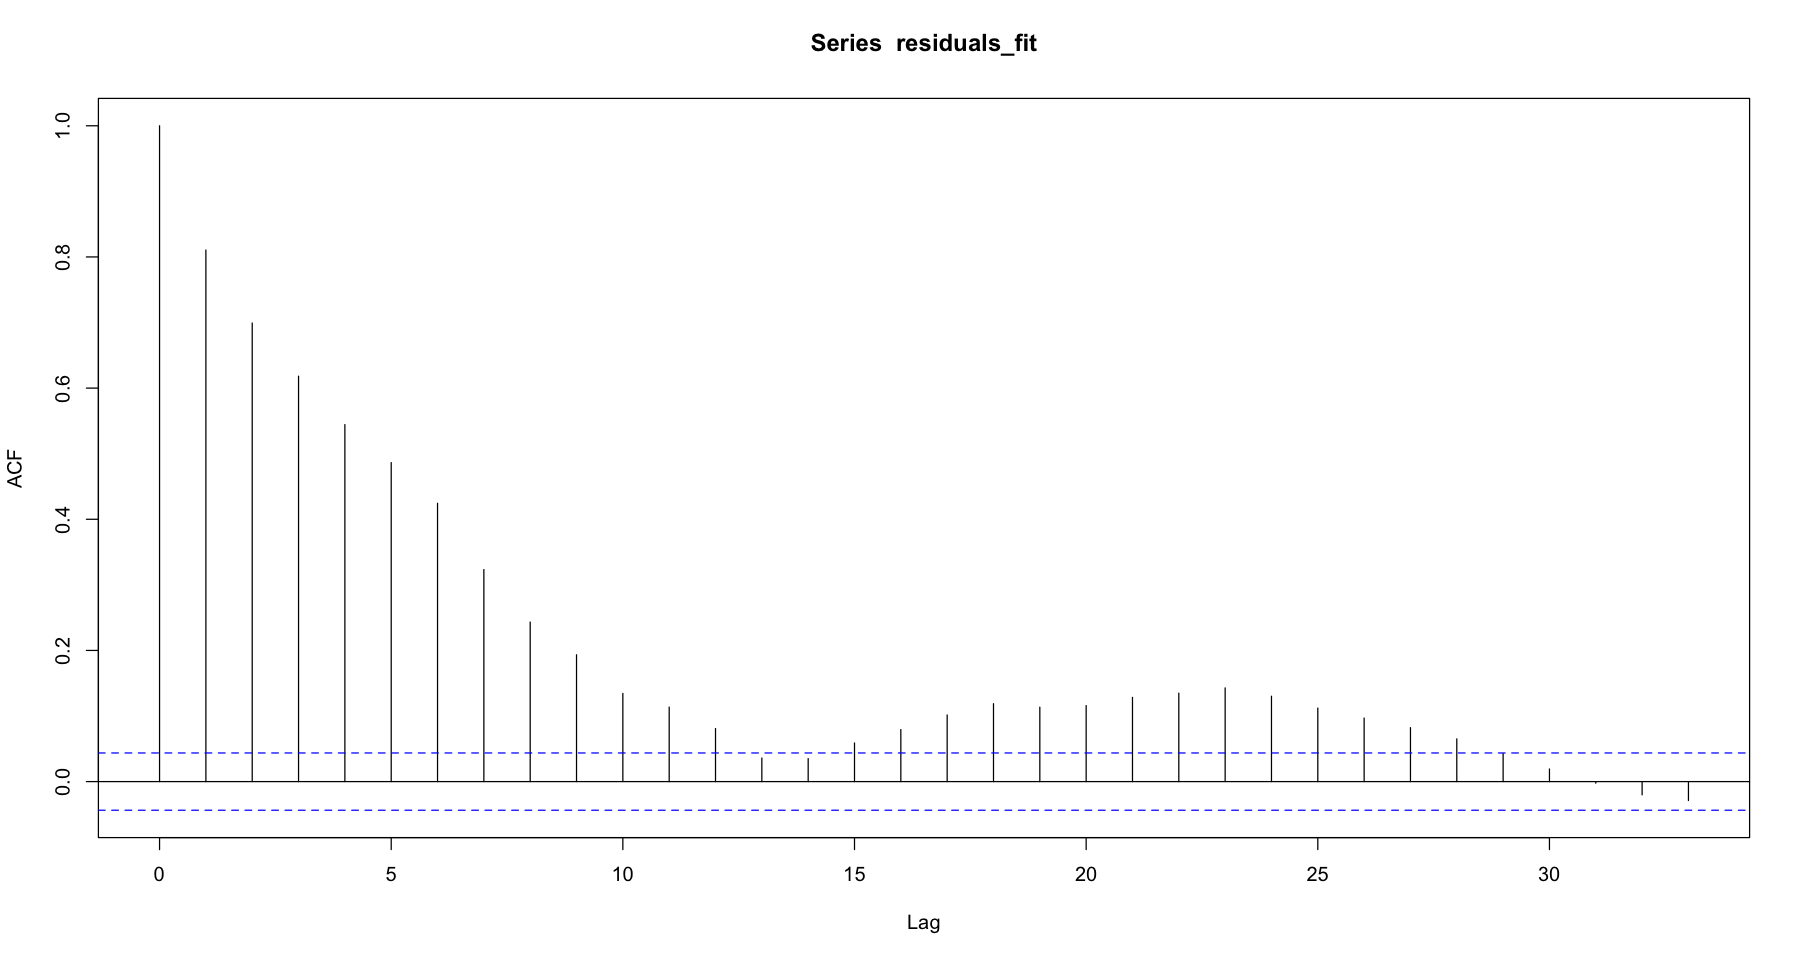

In [15]:
acf(residuals_fit)

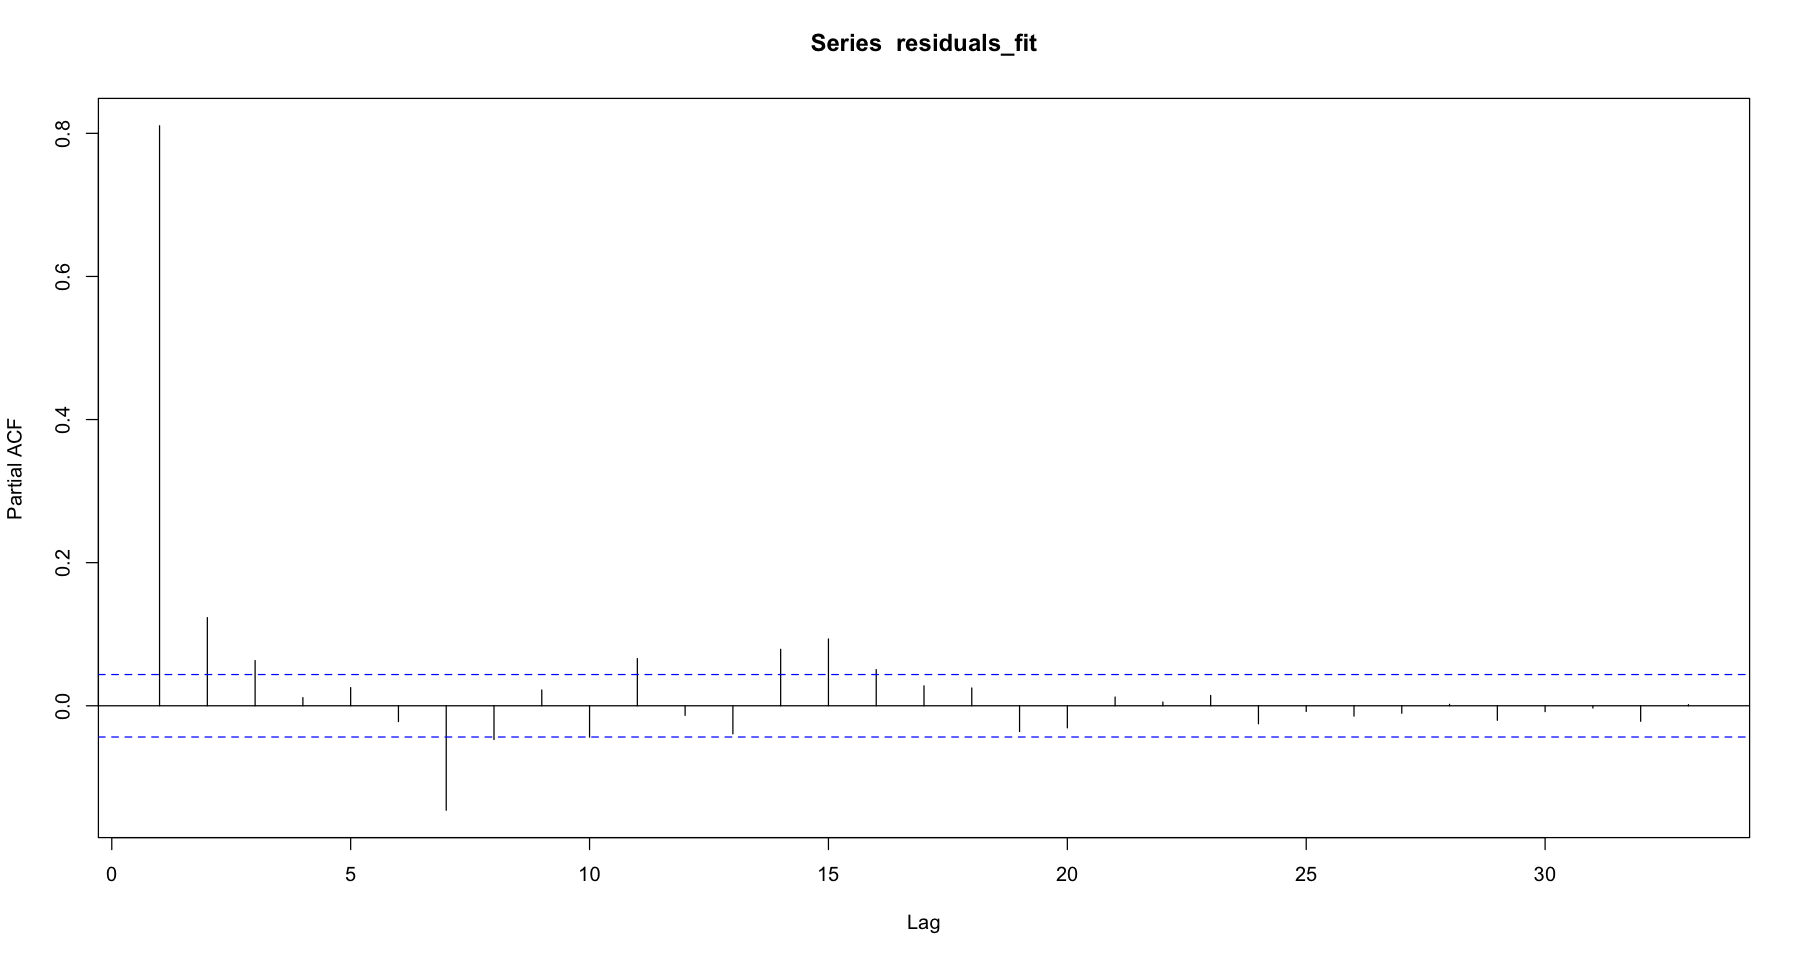

In [16]:
pacf(residuals_fit)

In [17]:
# Ajuste de ARIMA de AR 2 con Season 1
arima_fit = Arima(df_ts, order=c(2,0,0), seasonal = c(1,0,0), include.mean = FALSE)
summary(arima_fit)
residuals_arima_fit = residuals(arima_fit)
ajuste_arima = ts(fitted(arima_fit), start=2017, freq=freq)

In [ ]:
acf(residuals_arima_fit)
pacf(residuals_arima_fit)
checkresiduals(residuals_arima_fit)

In [ ]:
# Auto ARIMA con Seasonal
autoarima = auto.arima(df_ts, seasonal = TRUE)
ajuste_autoarima = ts(fitted(autoarima), start=0, freq=freq)
summary(autoarima)
residuals_autoarima = residuals(autoarima)

In [ ]:
acf(residuals_autoarima)
pacf(residuals_autoarima)

In [ ]:
head(df_raw)

In [59]:
# some made-up data
originaldf <- df_raw



originaldf$minAsPOSIX <- as.POSIXct(originaldf$date, format="%d/%m/%y %H:%M",tz="GMT")



# Generate vector of all minutes
ndays <- 365 # number of days to generate
minAsNumeric <-seq(0,60*60*24*ndays,by=5*60)# 60*60*24*243 + 



# convert those minutes to POSIX
minAsPOSIX <- as.POSIXct(minAsNumeric, origin="2017-01-01", tz="GMT")

base_df = data.frame(minAsPOSIX)

# new df
df <- merge(base_df,originaldf,all.x=TRUE, by="minAsPOSIX")

In [61]:
newdf = aggregate(df$volumen, by=list(Date=df$minAsPOSIX), FUN=sum)
newdf

Date,x
<dttm>,<int>
2017-01-01 00:00:00,0
2017-01-01 00:05:00,0
2017-01-01 00:10:00,16
2017-01-01 00:15:00,6
2017-01-01 00:20:00,11
2017-01-01 00:25:00,14
2017-01-01 00:30:00,24
2017-01-01 00:35:00,7
2017-01-01 00:40:00,6


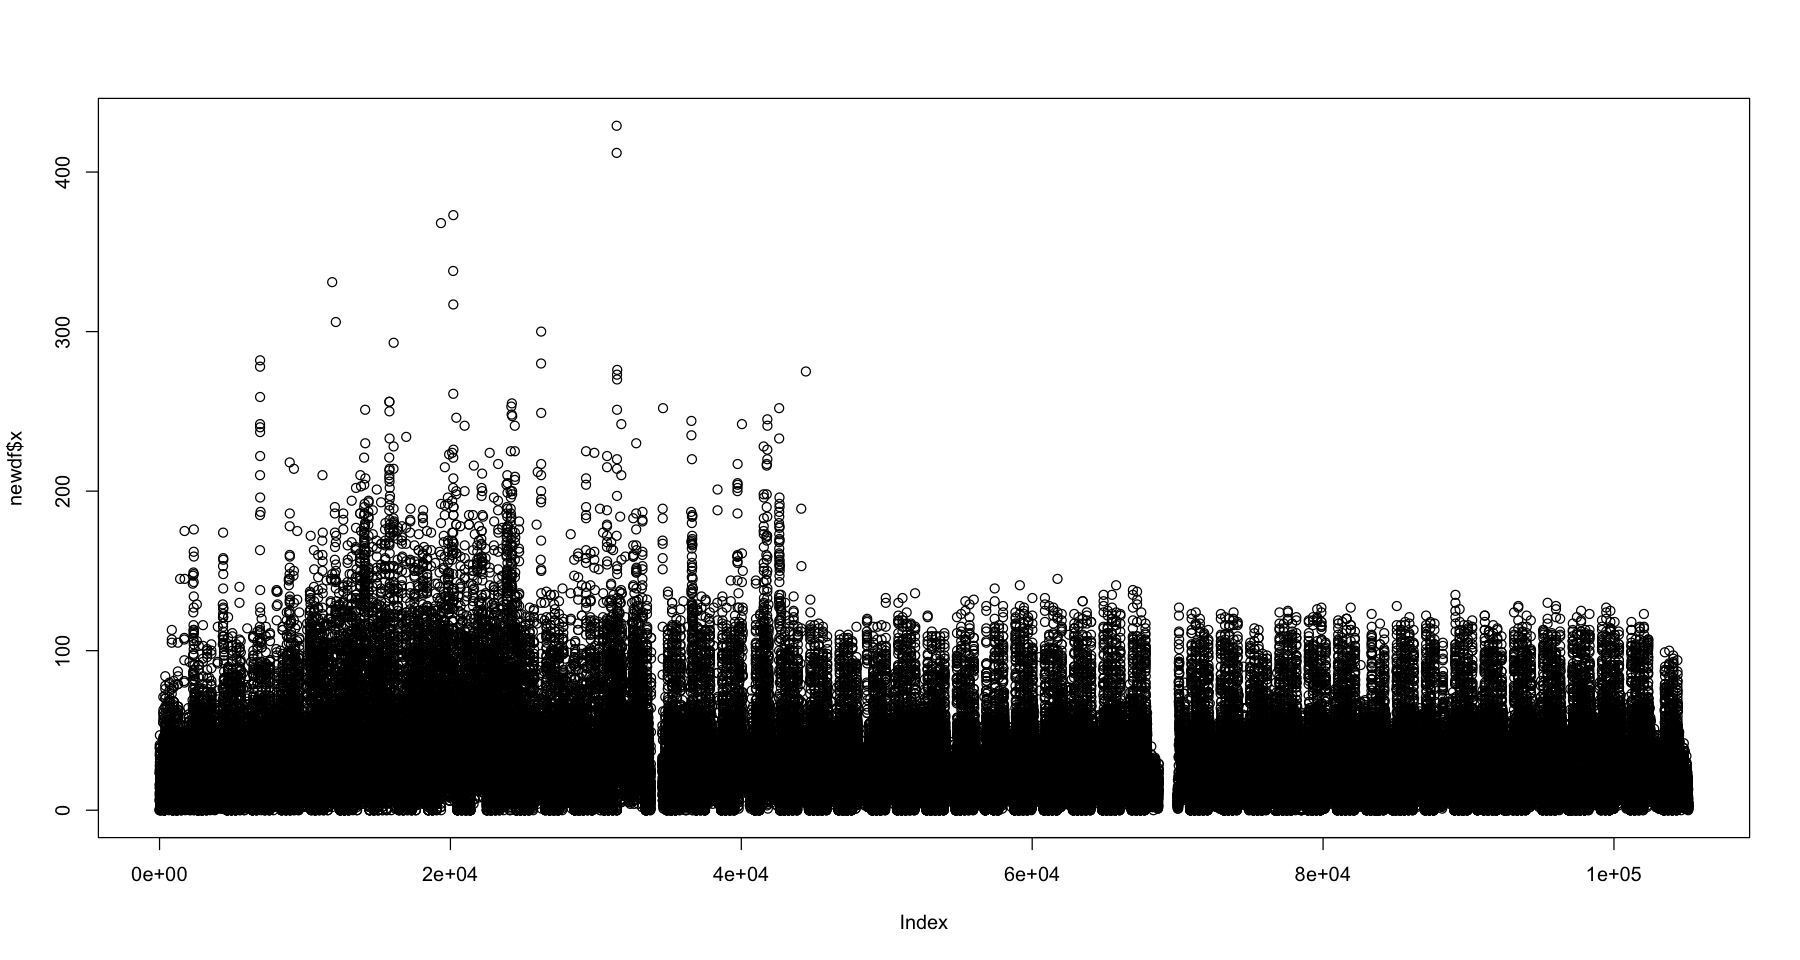

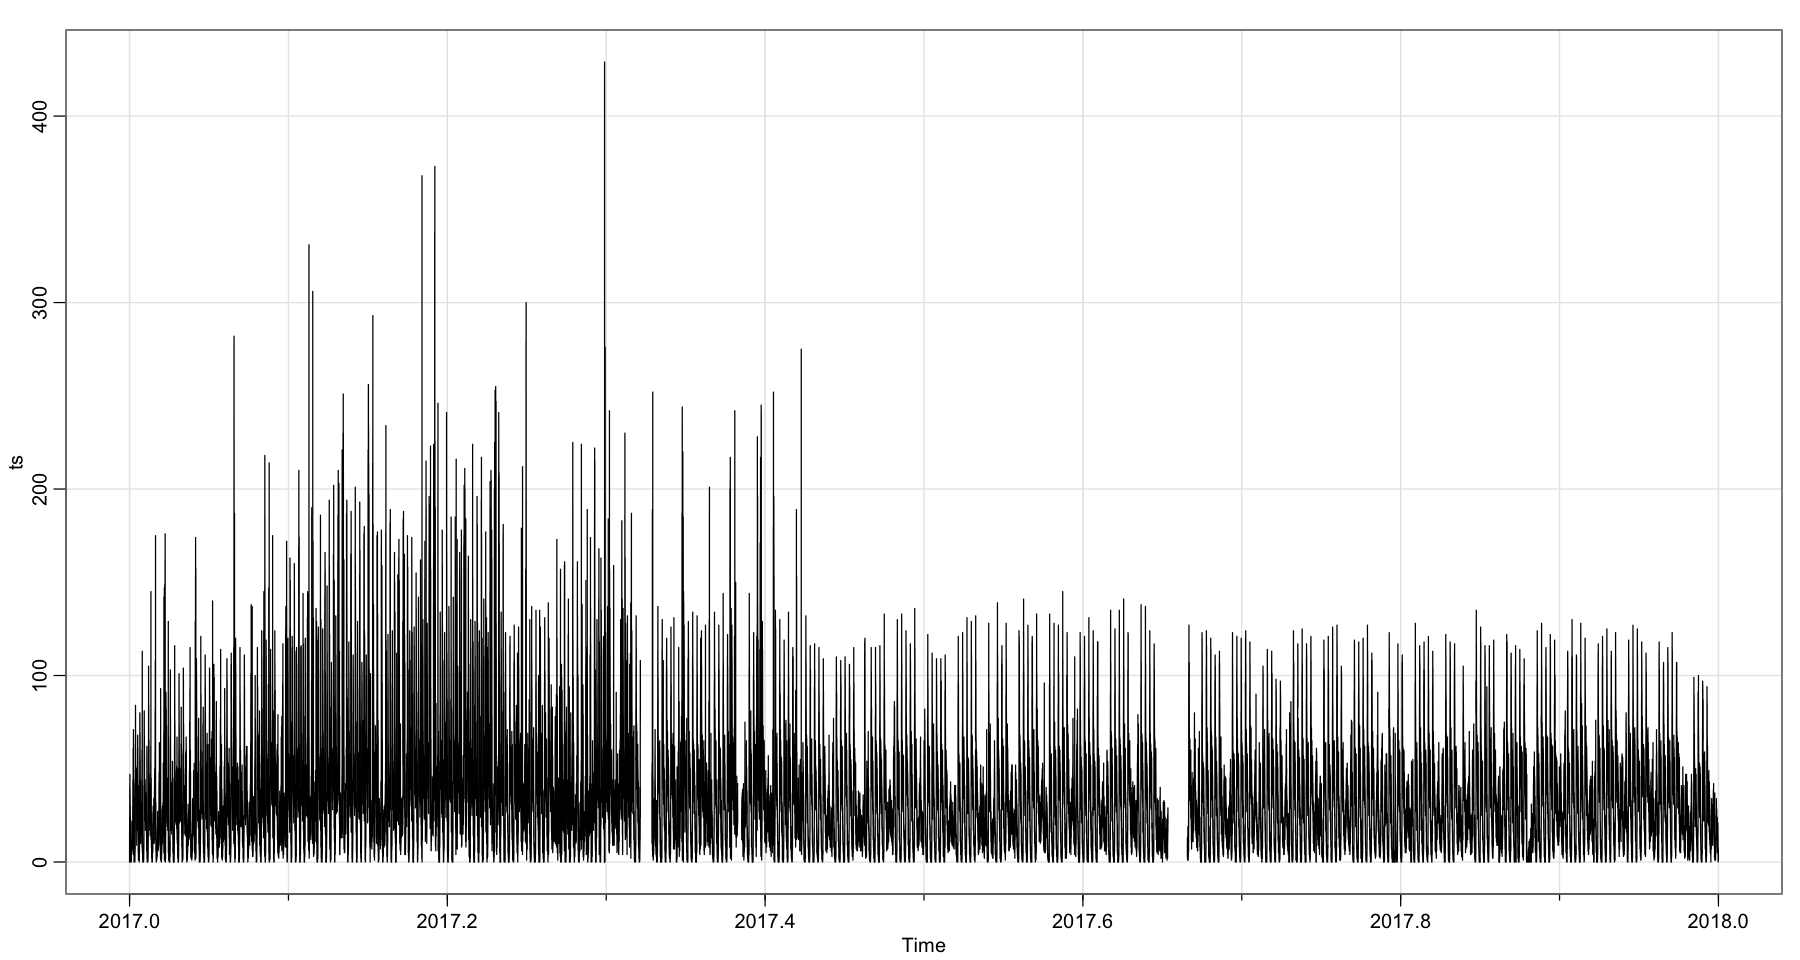

In [63]:
ts = ts(newdf$x, frequency=freq*3, start=c(2017,1))
plot(newdf$x)
tsplot(ts)